A= 6.014165757866667e-26
B= 1.1190500431986397


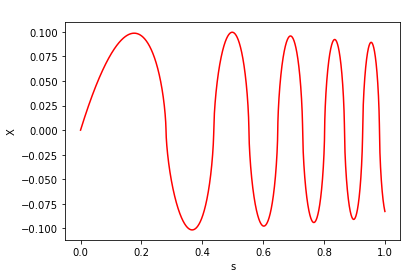

In [1]:
#h(s)= math.sqrt((s**-2)+(s**-4))
#h'(s)= -((3*s+4)/(2*h(s)*(s**5)))
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.integrate import odeint
M_pbh=1.989e32
pi=3.14
rho_eq=2.15368e-16
t_eq=1.0988e12
G=6.67e-11
x=0.2*3.086e16
A=((4*pi*G*rho_eq)/3)
print('A=',A)
B=((64*pi*G*rho_eq*((t_eq)**2))/3)**(3/4)
print('B=',B)
def M_total(s):
    return (M_pbh + M_pbh*(1+(2/3)*(s-2)*((s+1)**(1/2))+(4/3)))
def λ(s):
    return ((A*(x**3))/(B*M_total(s)))
def h(s):
    return math.sqrt((s**-3)+(s**-4))
def g(s):
        return  -((3*s+4)/(2*h(s)*(s**5)))   #g(s)=h'(s).

def f(u,s):
    return [u[1], -((s*g(s)+h(s))*((s*u[1]-u[0]))/(h(s)*s**2))-(((u[0]*G)/((((h(s)*s)**2))* λ(s)
                    *((u[0]**2+b**2)**(3/2)))))]
b=1e-5
M=1.989e32
separation0= [1e-12,1]
ss= np.linspace(1e-12,1,100000) 
us= odeint(f,separation0,ss)
separations= us[:,0]
As=ss
Bs=separations
plt.plot(As,Bs,'r')
plt.xlabel('s')
plt.ylabel('X')
plt.title(' ')
plt.show()